In [1]:
import sys; from __init__ import PRP; sys.path.append(PRP)

from evaluations.utils_evals import prepare_model, make_grid
from csvflowdatamodule.CsvDataset import FilesLoaders

from torchvision.utils import flow_to_image
from glob import glob
from natsort import natsorted

## Load Model

In [2]:
%%capture
model_dir = '../SavedModels/306h8xd2_copy/'
model = prepare_model(model_dir).eval();
predictor = model.backbone_model.model.model

Lightning automatically upgraded your loaded checkpoint from v1.8.6 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../SavedModels/306h8xd2_copy/checkpoints/saved_145-epoch_val_loss:0.17428.ckpt`


## Load Flow File 

In [24]:
pflows = natsorted(glob('../images/blackswan_davis/*.flo')) # scooter-black_davis

In [25]:
fl = FilesLoaders()
flows = [fl.load_file(pfl, 'Flow', model.hparams['img_size']) for pfl in pflows]

## Prediction using the backbone

In [29]:
logits, auxs = predictor(torch.stack(flows, dim=1)[None])
pred = torch.softmax(logits, axis=1)

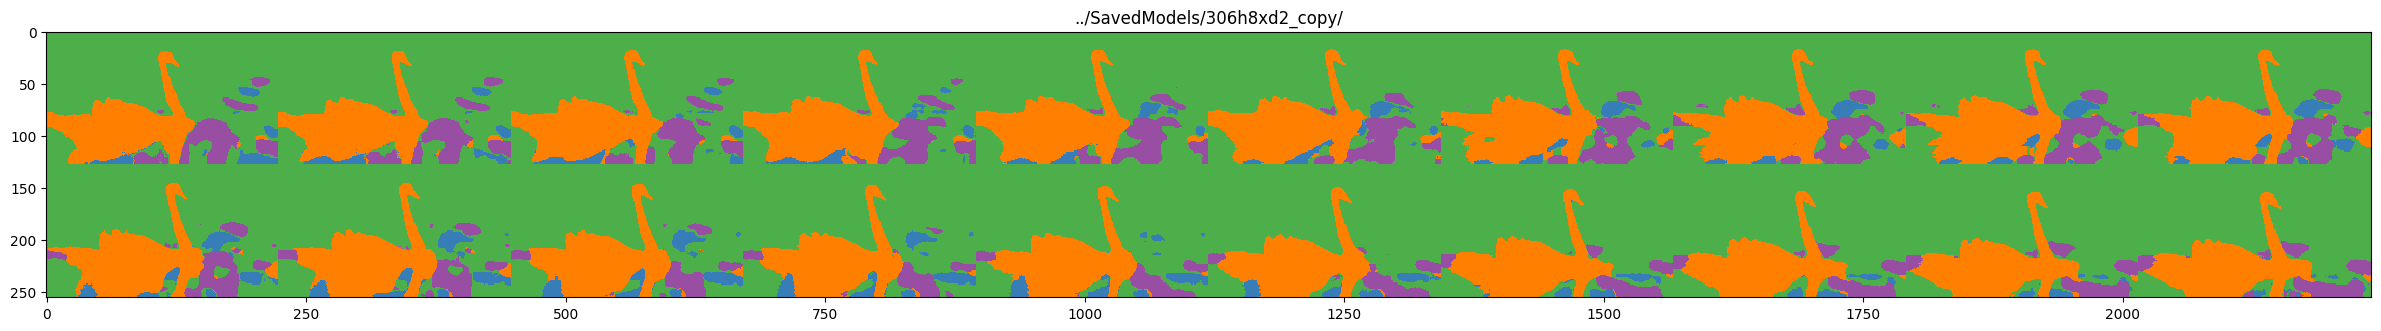

In [32]:
plt.figure(figsize=(30,15))
plt.title(model_dir)
# Read from left to right and from top to bottom
plt.imshow(make_grid(pred.argmax(1)[0], col_width=10),
           interpolation='none',cmap='Set1', vmin=-1, vmax=8)
plt.show() 